In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("downloaded-logs-20210417-093257.csv")

In [3]:
df.head()

,insertId,labels.protocol,labels.request_id,labels.type,logName,receiveTimestamp,resource.labels.project_id,resource.type,severity,textPayload,timestamp,trace
0,12aiicfg323yea0,V2,e55da12d-5b10-4905-8824-c33f5999ee0a-d74139ee,dialogflow_response,projects/rpg-chatbot-qaol/logs/dialogflow_agent,2021-04-17T12:31:33.213563591Z,rpg-chatbot-qaol,global,INFO,"Dialogflow Response : id: ""e55da12d-5b10-4905-...",2021-04-17T12:31:33.202922Z,webdemo-8e9e7087-e736-1ce5-1ac6-44439f6b6fd2
1,12aiicfg323ye9z,V2,e55da12d-5b10-4905-8824-c33f5999ee0a-d74139ee,dialogflow_request,projects/rpg-chatbot-qaol/logs/dialogflow_agent,2021-04-17T12:31:33.213563591Z,rpg-chatbot-qaol,global,INFO,"Dialogflow Request : {""session"":""webdemo-8e9e7...",2021-04-17T12:31:33.169Z,webdemo-8e9e7087-e736-1ce5-1ac6-44439f6b6fd2
2,1s3vmqag3jbmzs2,V2,292f9bb5-16a7-4629-b560-30c78baaa6d5-d74139ee,dialogflow_response,projects/rpg-chatbot-qaol/logs/dialogflow_agent,2021-04-17T12:31:25.030692240Z,rpg-chatbot-qaol,global,INFO,"Dialogflow Response : id: ""292f9bb5-16a7-4629-...",2021-04-17T12:31:25.021364Z,webdemo-8e9e7087-e736-1ce5-1ac6-44439f6b6fd2
3,1s3vmqag3jbmzs0,V2,292f9bb5-16a7-4629-b560-30c78baaa6d5-d74139ee,dialogflow_request,projects/rpg-chatbot-qaol/logs/dialogflow_agent,2021-04-17T12:31:25.030692240Z,rpg-chatbot-qaol,global,INFO,"Dialogflow Request : {""session"":""webdemo-8e9e7...",2021-04-17T12:31:24.993Z,webdemo-8e9e7087-e736-1ce5-1ac6-44439f6b6fd2
4,19s6nyug338253t,V2,989afe84-4853-4471-9bef-69acb638a2ca-d74139ee,dialogflow_response,projects/rpg-chatbot-qaol/logs/dialogflow_agent,2021-04-17T12:31:18.105005280Z,rpg-chatbot-qaol,global,INFO,"Dialogflow Response : id: ""989afe84-4853-4471-...",2021-04-17T12:31:18.094301Z,webdemo-8e9e7087-e736-1ce5-1ac6-44439f6b6fd2


In [4]:
payloads_response = [ x for x in df[df['textPayload'].str.startswith('Dialogflow Response')]['textPayload']]

In [5]:
intents_regex = re.compile('(.*intent_name:\s\")(.*)(\".*webhook_used.*)', flags=re.MULTILINE|re.DOTALL)
intents = [intents_regex.search(s).groups()[1] for s in payloads_response]

In [6]:
fallback_regex = re.compile('(.*is_fallback_intent:\s\")(.*)(\".*fulfillment.*)', flags=re.MULTILINE|re.DOTALL)
fallback = [fallback_regex.search(s).groups()[1] for s in payloads_response]

In [7]:
linguagem_programacao_regex = re.compile('(.*linguagem_programacao".*")(.*)(".*fields.*)', flags=re.MULTILINE|re.DOTALL)
linguagem_programacao_groups = [linguagem_programacao_regex.search(s) for s in payloads_response]
linguagem_programacao = [x.groups()[1] for x in linguagem_programacao_groups if not x is None]

In [8]:
banco_de_dados_regex = re.compile('(.*banco_dados".*")(.*)(".*fields.*)', flags=re.MULTILINE|re.DOTALL)
banco_de_dados_groups = [banco_de_dados_regex.search(s) for s in payloads_response]
banco_de_dados = [x.groups()[1] for x in banco_de_dados_groups if not x is None]

In [9]:
provedor_nuvem_regex = re.compile('(.*provedor_nuvem".*")(.*)(".*metadata.*)', flags=re.MULTILINE|re.DOTALL)
provedor_nuvem_groups = [provedor_nuvem_regex.search(s) for s in payloads_response]
provedor_nuvem = [x.groups()[1] for x in provedor_nuvem_groups if not x is None]

In [10]:
print("Número de interações {}.".format(len(payloads_response)))

Número de interações 73.


(array([ 5.,  6.,  6.,  8.,  8.,  4., 14., 15.,  2.,  5.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

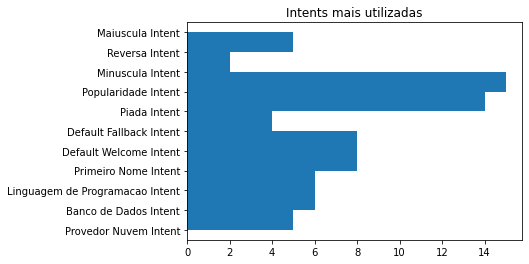

In [11]:
plt.title("Intents mais utilizadas")
plt.hist(intents, orientation="horizontal")

(array([69.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

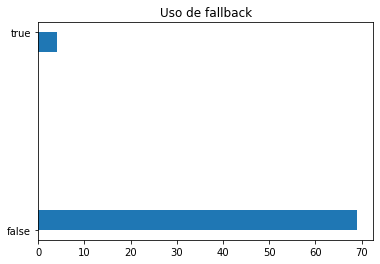

In [12]:
plt.title("Uso de fallback")
plt.hist(fallback, orientation="horizontal")

(array([1., 0., 1., 0., 0., 1., 0., 3., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

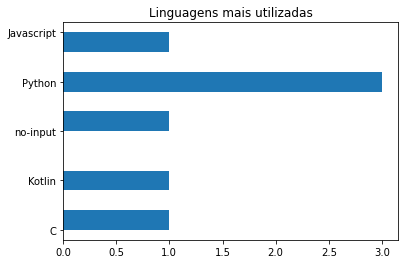

In [13]:
plt.title("Linguagens mais utilizadas")
plt.hist(linguagem_programacao, orientation="horizontal")

(array([1., 0., 1., 0., 0., 1., 0., 2., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

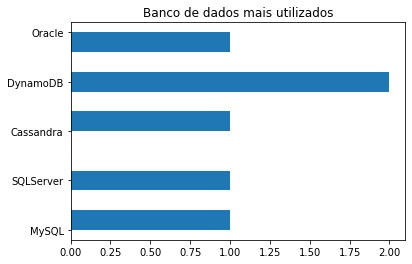

In [14]:
plt.title("Banco de dados mais utilizados")
plt.hist(banco_de_dados, orientation="horizontal")

(array([1., 0., 0., 1., 0., 0., 2., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

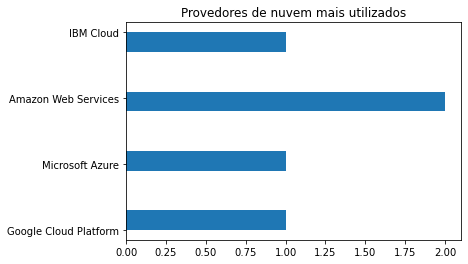

In [15]:
plt.title("Provedores de nuvem mais utilizados")
plt.hist(provedor_nuvem, orientation="horizontal")